#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2019





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

 99% 1.71G/1.72G [00:17<00:00, 93.1MB/s]
100% 1.72G/1.72G [00:17<00:00, 106MB/s] 


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2019.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2019.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2019.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2019.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'#SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df9 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2019.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df18 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2019.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df9

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,3,1,2019,"1287,60",F,2014,"0,00","100,00","49091,15",02/07/1978,N,P,Masculino,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,2,1,2019,"1287,60",F,2014,"0,00","100,00","49091,15",02/07/1978,N,P,Masculino,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,1,1,2019,"1287,60",F,2014,"0,00","100,00","49091,15",02/07/1978,N,P,Masculino,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,4,1,2019,"1287,60",F,2014,"0,00","100,00","49091,15",02/07/1978,N,P,Masculino,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,5,1,2019,"1287,60",F,2014,"0,00","100,00","49091,15",02/07/1978,N,P,Masculino,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095902,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,2,1,2019,"6111,13",F,2017,"0,00","82,00","42901,36",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5
3095903,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,1,1,2019,"6111,13",F,2017,"0,00","82,00","42901,36",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5
3095904,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,4,1,2019,"6111,13",F,2017,"0,00","82,00","42901,36",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5
3095905,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,319,2825022,Caixa Econômica Federal,5,1,2019,"6111,13",F,2017,"0,00","82,00","42901,36",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,6


In [ ]:
pd.set_option('display.max_columns', 50)
df18

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,5,1,2012,"394,15",N,2011.0,"0,00","50,00","6000,91",03/05/1993,N,S,Feminino,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,6,1,2012,"394,16",N,2011.0,"0,00","50,00","6000,91",03/05/1993,N,S,Feminino,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,1,1,2012,"394,15",N,2011.0,"0,00","50,00","6000,91",03/05/1993,N,S,Feminino,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,2,1,2012,"394,15",N,2011.0,"0,00","50,00","6000,91",03/05/1993,N,S,Feminino,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,3,1,2012,"394,15",N,2011.0,"0,00","50,00","6000,91",03/05/1993,N,S,Feminino,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553687,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,8,2,2019,"1121,08",F,2017.0,"0,00","85,00","20886,70",03/11/1990,N,S,Masculino,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10
553688,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,9,2,2019,"1121,08",F,2017.0,"0,00","85,00","20886,70",03/11/1990,N,S,Masculino,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10
553689,NaN,NaN,FACULDADE CATÓLICA DO RIO GRANDE DO NORTE,325,2830492,Caixa Econômica Federal,8,2,2019,"839,23",F,2017.0,"0,00","80,00","18827,89",02/01/1997,N,S,Feminino,Solteiro,Pardo,"80,00",10.0,DIREITO,Bacharelado,Semestral,2019,9
553690,NaN,NaN,FACULDADE CATÓLICA DO RIO GRANDE DO NORTE,325,2830492,Caixa Econômica Federal,7,2,2019,"839,23",F,2017.0,"0,00","80,00","18827,89",02/01/1997,N,S,Feminino,Solteiro,Pardo,"80,00",10.0,DIREITO,Bacharelado,Semestral,2019,9


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2019.1

###Retirando as repetições

In [ ]:
repeticoes = df9['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df9['MESES_CONSEDIDOS'] = df9.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df9

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,3,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,2,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,1,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,4,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,5,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095902,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,2,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095903,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,1,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095904,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,4,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095905,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,319,2825022,Caixa Econômica Federal,5,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,6,6


In [ ]:
df9DuplicateRows = df9[df9.duplicated(subset='CO_CONTRATO_FIES')]
df9DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,2,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,1,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,4,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,5,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,321,1567557,Banco do Brasil,6,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095902,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,2,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095903,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,1,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095904,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2825022,Caixa Econômica Federal,4,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,5,6
3095905,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,319,2825022,Caixa Econômica Federal,5,1,2019,"6111,13",...,União estável,Pardo,"82,00",15,MEDICINA,Bacharelado,Semestral,2019,6,6


In [ ]:
df9ComLinhasDuplicads = df9
df9 = df9.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df9

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,1567557,Banco do Brasil,3,1,2019,"1287,60",...,Solteiro,Branco,"100,00",10,DIREITO,Bacharelado,Anual,2019,6,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,317,2252250,Banco do Brasil,2,1,2019,"1036,00",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2019,5,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,317,2813748,Caixa Econômica Federal,1,1,2019,"643,80",...,Casado,Negro,"50,00",10,DIREITO,Bacharelado,Anual,2019,5,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,319,2711542,Caixa Econômica Federal,4,1,2019,"579,42",...,Casado,Branco,"55,00",8,ARQUITETURA E URBANISMO,Bacharelado,Anual,2019,6,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,317,2219051,Banco do Brasil,3,1,2019,"1371,46",...,Solteiro,Pardo,"100,00",10,DIREITO,Bacharelado,Anual,2019,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095877,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2819848,Caixa Econômica Federal,1,1,2019,"5397,18",...,Solteiro,Pardo,"75,00",14,MEDICINA,Bacharelado,Semestral,2019,5,6
3095883,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2819987,Caixa Econômica Federal,2,1,2019,"1662,95",...,Solteiro,Pardo,"62,00",9,ODONTOLOGIA,Bacharelado,Semestral,2019,5,6
3095889,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,317,2820695,Caixa Econômica Federal,1,1,2019,"685,50",...,Solteiro,Pardo,"77,00",9,ENGENHARIA CIVIL,Bacharelado,Semestral,2019,5,6
3095895,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,319,2822706,Caixa Econômica Federal,2,1,2019,"7163,95",...,Divorciado,Pardo,"84,00",11,MEDICINA,Bacharelado,Semestral,2019,6,6


In [ ]:
df9ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

2446319    90
804459     72
1872304    60
967760     60
2913647    48
           ..
1039379     1
2456907     1
1639576     1
1525187     1
1804515     1
Name: CO_CONTRATO_FIES, Length: 512085, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df9.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,512085.000000,5.120850e+05,512085.000000,512085.000000,512085.000000,512085.000000,512085.000000,512085.0,512085.000000,512085.000000
mean,316.309865,2.305903e+06,2.477841,1.016595,2018.947062,2015.369243,9.483916,2019.0,4.842061,6.045690
std,3.590682,4.198487e+05,1.657201,0.127748,0.394698,1.198928,1.406538,0.0,1.190407,0.840313
min,308.000000,1.116740e+05,1.000000,1.000000,2010.000000,2007.000000,1.000000,2019.0,2.000000,1.000000
25%,314.000000,2.073145e+06,1.000000,1.000000,2019.000000,2014.000000,9.000000,2019.0,4.000000,6.000000
50%,317.000000,2.403018e+06,2.000000,1.000000,2019.000000,2015.000000,10.000000,2019.0,5.000000,6.000000
75%,319.000000,2.641143e+06,4.000000,1.000000,2019.000000,2016.000000,10.000000,2019.0,6.000000,6.000000
max,322.000000,2.953627e+06,12.000000,2.000000,2019.000000,2018.000000,21.000000,2019.0,7.000000,90.000000


In [ ]:
df9.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   116
NU_PERCENTUAL_PROUNI               86
DS_PERIODICIDADE_CUR                3
NO_IES                              1
#SG_UF                              0
ST_DEFICIENCIA                      0
NU_MES_PROC                         0
NU_ANO_PROC                         0
DS_TIPO_CURSO                       0
DS_CURSO                            0
QT_SEMESTRE_FINANCIADO              0
VL_PERC_FINANCIAMENTO               0
DS_RACA_COR                         0
DS_SEXO                             0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA      0
VL_REPASSE                          0
DT_NASCIMENTO                       0
NO_MUNICIPIO                        0
NU_PERCENT_SOLICITADO_FINANC        0
NU_ANO_EXERCICIO_INSC               0
TP_FIANCA                           0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_

In [ ]:
df9.dropna(axis=0, inplace=True)

In [ ]:
df9.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df9.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,511879.000000,5.118790e+05,511879.000000,511879.000000,511879.000000,511879.000000,511879.000000,511879.0,511879.000000,511879.000000
mean,316.310261,2.305936e+06,2.477695,1.016578,2018.947091,2015.369429,9.483837,2019.0,4.842160,6.045655
std,3.590283,4.198839e+05,1.656921,0.127685,0.394674,1.199023,1.406663,0.0,1.190249,0.840102
min,308.000000,1.116740e+05,1.000000,1.000000,2010.000000,2007.000000,1.000000,2019.0,2.000000,1.000000
25%,314.000000,2.073112e+06,1.000000,1.000000,2019.000000,2014.000000,9.000000,2019.0,4.000000,6.000000
50%,317.000000,2.403226e+06,2.000000,1.000000,2019.000000,2015.000000,10.000000,2019.0,5.000000,6.000000
75%,319.000000,2.641208e+06,4.000000,1.000000,2019.000000,2016.000000,10.000000,2019.0,6.000000,6.000000
max,322.000000,2.953627e+06,12.000000,2.000000,2019.000000,2018.000000,21.000000,2019.0,7.000000,90.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df9['REGIAO'] = df9['#SG_UF']

In [ ]:
df9['REGIAO']= df9['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df9['REGIAO']= df9['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df9['REGIAO']= df9['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df9['REGIAO']= df9['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df9['REGIAO']= df9['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df9['CATEGORIA_CIENCIA_CURSO'] = df9['DS_CURSO']

In [ ]:
df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO'
], 
'Ciências Sociais Aplicadas')


df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE'
], 
'Ciências Exatas e da Terra')

df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL'
], 
'Engenharias')

df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA'
], 
'Ciências Agrárias')

df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df9['CATEGORIA_CIENCIA_CURSO']= df9['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃO BÁSICA E PROFISSIONAL.'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df9['VL_REPASSE'] = df9['VL_REPASSE'].astype('str')
df9['VL_REPASSE'] = df9['VL_REPASSE'].str.replace(',', '.')
df9['VL_REPASSE']  = pd.to_numeric(df9['VL_REPASSE'], errors='coerce')

df9['VL_MENSALIDADE'] = df9['VL_MENSALIDADE'].astype('str')
df9['VL_MENSALIDADE'] = df9['VL_MENSALIDADE'].str.replace(',', '.')
df9['VL_MENSALIDADE']  = pd.to_numeric(df9['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df9['VALOR_SEMESTRE_PAGO'] = np.where(df9['MESES_CONSEDIDOS'] > 6,
                                           df9['VL_MENSALIDADE'] * 6,
                                           df9['VL_MENSALIDADE'] * df9['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df9['VALOR_ARQUIVO_PAGO'] = df9['VL_MENSALIDADE'] * df9['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df9['MESES_CONSEDIDOS'].value_counts()

6     502314
12      4807
2       1153
1       1004
5        694
4        668
3        547
18       342
8        179
24        81
30        21
36        15
14        10
11         9
42         8
10         7
9          3
17         3
48         2
60         2
16         2
72         1
19         1
90         1
46         1
7          1
20         1
29         1
27         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df9['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df9['VL_REPASSE'] - df9['VALOR_ARQUIVO_PAGO']

In [ ]:
df9["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

41256.53    163
45280.57    124
83289.64    123
76872.69    118
79182.58    113
           ... 
16617.46      1
17763.40      1
27538.23      1
13687.32      1
6234.58       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 452946, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2019.2

###Retirando as repetições

In [ ]:
repeticoes = df18['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df18['MESES_CONSEDIDOS'] = df18.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df18

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,5,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,6,1,2012,"394,16",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,1,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,2,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,3,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553687,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,8,2,2019,"1121,08",...,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10,3
553688,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,9,2,2019,"1121,08",...,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10,3
553689,NaN,NaN,FACULDADE CATÓLICA DO RIO GRANDE DO NORTE,325,2830492,Caixa Econômica Federal,8,2,2019,"839,23",...,Solteiro,Pardo,"80,00",10.0,DIREITO,Bacharelado,Semestral,2019,9,3
553690,NaN,NaN,FACULDADE CATÓLICA DO RIO GRANDE DO NORTE,325,2830492,Caixa Econômica Federal,7,2,2019,"839,23",...,Solteiro,Pardo,"80,00",10.0,DIREITO,Bacharelado,Semestral,2019,9,3


In [ ]:
df18DuplicateRows = df18[df18.duplicated(subset='CO_CONTRATO_FIES')]
df18DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,6,1,2012,"394,16",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,1,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,2,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,3,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,4,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553685,NaN,NaN,FACULDADE REGIONAL DE ALAGOINHAS,327,2783223,Caixa Econômica Federal,9,2,2019,"1044,02",...,União estável,Pardo,"77,00",10.0,DIREITO,Bacharelado,Semestral,2019,10,3
553687,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,8,2,2019,"1121,08",...,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10,3
553688,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,9,2,2019,"1121,08",...,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10,3
553690,NaN,NaN,FACULDADE CATÓLICA DO RIO GRANDE DO NORTE,325,2830492,Caixa Econômica Federal,7,2,2019,"839,23",...,Solteiro,Pardo,"80,00",10.0,DIREITO,Bacharelado,Semestral,2019,9,3


In [ ]:
df18ComLinhasDuplicads = df18
df18 = df18.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df18

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,274338,Caixa Econômica Federal,5,1,2012,"394,15",...,Solteiro,Branco,"50,00",10.0,PSICOLOGIA,Bacharelado,Anual,2019,9,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,323,1567557,Banco do Brasil,7,2,2019,"1308,32",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2019,8,3
9,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,2252250,Banco do Brasil,7,2,2019,"1006,40",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2019,9,3
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,327,2813748,Caixa Econômica Federal,7,2,2019,"654,16",...,Casado,Negro,"50,00",10.0,DIREITO,Bacharelado,Anual,2019,10,3
15,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,325,2219051,Banco do Brasil,7,2,2019,"1408,96",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2019,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553668,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2765937,Banco do Brasil,6,1,2018,"1296,70",...,Solteiro,Pardo,"82,00",10.0,ENGENHARIA BIOMÉDICA,Bacharelado,Semestral,2019,10,12
553680,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2784926,Caixa Econômica Federal,7,2,2019,"1121,08",...,Solteiro,Pardo,"96,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2019,10,3
553683,NaN,NaN,FACULDADE REGIONAL DE ALAGOINHAS,327,2783223,Caixa Econômica Federal,8,2,2019,"1044,02",...,União estável,Pardo,"77,00",10.0,DIREITO,Bacharelado,Semestral,2019,10,3
553686,NaN,NaN,FACULDADES INTEGRADAS DO NORTE DE MINAS - FUNORTE,327,2827705,Caixa Econômica Federal,7,2,2019,"1121,08",...,Divorciado,Pardo,"85,00",10.0,ENGENHARIA MECÂNICA,Bacharelado,Semestral,2019,10,3


In [ ]:
df18ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

2357525    51
2913582    36
1360944    36
852829     36
141704     36
           ..
1546227     1
1615040     1
2216782     1
1985873     1
1620545     1
Name: CO_CONTRATO_FIES, Length: 172789, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df18.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,172789.000000,1.727890e+05,172789.000000,172789.000000,172789.000000,172788.000000,172788.000000,172789.0,172789.000000,172789.000000
mean,326.469006,2.374225e+06,7.583029,1.953272,2018.889183,2015.588015,9.587477,2019.0,9.643004,3.204440
std,1.250685,4.229022e+05,1.347490,0.211055,0.867698,1.227072,1.386901,0.0,0.591510,0.951765
min,323.000000,1.113280e+05,1.000000,1.000000,2010.000000,2007.000000,1.000000,2019.0,8.000000,1.000000
25%,325.000000,2.216197e+06,7.000000,2.000000,2019.000000,2015.000000,9.000000,2019.0,9.000000,3.000000
50%,327.000000,2.475264e+06,8.000000,2.000000,2019.000000,2016.000000,10.000000,2019.0,10.000000,3.000000
75%,327.000000,2.671519e+06,8.000000,2.000000,2019.000000,2017.000000,10.000000,2019.0,10.000000,3.000000
max,328.000000,2.990316e+06,12.000000,2.000000,2019.000000,2019.000000,19.000000,2019.0,10.000000,51.000000


In [ ]:
df18.isnull().sum().sort_values(ascending=False)

#SG_UF                            109
NO_MUNICIPIO                      109
NU_PERCENTUAL_PROUNI               40
DS_ESTADO_CIVIL                    33
DS_PERIODICIDADE_CUR               14
DS_TIPO_CURSO                      11
NO_IES                              2
NU_ANO_EXERCICIO_INSC               1
NU_PERCENT_SOLICITADO_FINANC        1
QT_SEMESTRE_FINANCIADO              1
VL_PERC_FINANCIAMENTO               1
DS_RACA_COR                         0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA      0
DS_CURSO                            0
NU_ANO_PROC                         0
NU_MES_PROC                         0
DS_SEXO                             0
VL_REPASSE                          0
ST_DEFICIENCIA                      0
DT_NASCIMENTO                       0
TP_FIANCA                           0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_

In [ ]:
df18.dropna(axis=0, inplace=True)

In [ ]:
df18.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df18.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,172592.000000,1.725920e+05,172592.000000,172592.000000,172592.000000,172592.000000,172592.000000,172592.0,172592.000000,172592.000000
mean,326.468875,2.374319e+06,7.582999,1.953289,2018.889236,2015.588446,9.587206,2019.0,9.642857,3.204343
std,1.250888,4.229015e+05,1.347517,0.211020,0.867610,1.227040,1.387201,0.0,0.591553,0.951669
min,323.000000,1.113280e+05,1.000000,1.000000,2010.000000,2007.000000,1.000000,2019.0,8.000000,1.000000
25%,325.000000,2.216268e+06,7.000000,2.000000,2019.000000,2015.000000,9.000000,2019.0,9.000000,3.000000
50%,327.000000,2.475426e+06,8.000000,2.000000,2019.000000,2016.000000,10.000000,2019.0,10.000000,3.000000
75%,327.000000,2.671575e+06,8.000000,2.000000,2019.000000,2017.000000,10.000000,2019.0,10.000000,3.000000
max,328.000000,2.990316e+06,12.000000,2.000000,2019.000000,2019.000000,19.000000,2019.0,10.000000,51.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df18['REGIAO'] = df18['#SG_UF']

In [ ]:
df18['REGIAO']= df18['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df18['REGIAO']= df18['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df18['REGIAO']= df18['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df18['REGIAO']= df18['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df18['REGIAO']= df18['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df18['CATEGORIA_CIENCIA_CURSO'] = df18['DS_CURSO']

In [ ]:
df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO'
], 
'Ciências Sociais Aplicadas')


df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE'
], 
'Ciências Exatas e da Terra')

df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL'
], 
'Engenharias')

df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA'
], 
'Ciências Agrárias')

df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df18['CATEGORIA_CIENCIA_CURSO']= df18['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df18['VL_REPASSE'] = df18['VL_REPASSE'].astype('str')
df18['VL_REPASSE'] = df18['VL_REPASSE'].str.replace(',', '.')
df18['VL_REPASSE']  = pd.to_numeric(df18['VL_REPASSE'], errors='coerce')

df18['VL_MENSALIDADE'] = df18['VL_MENSALIDADE'].astype('str')
df18['VL_MENSALIDADE'] = df18['VL_MENSALIDADE'].str.replace(',', '.')
df18['VL_MENSALIDADE']  = pd.to_numeric(df18['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df18['VALOR_SEMESTRE_PAGO'] = np.where(df18['MESES_CONSEDIDOS'] > 6,
                                           df18['VL_MENSALIDADE'] * 6,
                                           df18['VL_MENSALIDADE'] * df18['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df18['VALOR_ARQUIVO_PAGO'] = df18['VL_MENSALIDADE'] * df18['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df18['MESES_CONSEDIDOS'].value_counts()

3     162251
6       8914
9        834
12       220
2        131
1        116
18        47
15        41
24         8
4          7
21         6
30         6
36         5
11         3
5          1
27         1
51         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df18['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df18['VL_REPASSE'] - df18['VALOR_ARQUIVO_PAGO']

In [ ]:
df18["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

44377.28     114
48782.38      86
430433.00     66
62870.42      63
397433.00     63
            ... 
8266.65        1
30875.69       1
44336.10       1
16271.06       1
24567.97       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 153490, dtype: int64

Esse é o primeiro arquivo que analisamos que o número que mais aparece não é 0.00, representando que a diferença dentre esses dois valores é bem maior do o dos outros anos analisados, o que é ruim para nossa análise. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2019.1

##Analisando os valores por estado.

In [ ]:
df9['#SG_UF'].value_counts()

SP    112560
MG     74709
BA     42761
RJ     38781
CE     27296
RS     24221
PE     22541
PR     21253
PB     20532
DF     14795
GO     14117
SC     12226
MT      9162
PA      9083
PI      8849
SE      8766
RN      7641
ES      7562
AM      7204
MA      7139
RO      5229
MS      4030
AC      3587
AL      2898
AP      1912
RR      1560
TO      1465
Name: #SG_UF, dtype: int64

In [ ]:
df9_estados_interativo = df9['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df9_estados_interativo.index,
               y=df9_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df9.REGIAO.value_counts()

SUDESTE         233612
NORDESTE        148423
SUL              57700
CENTRO-OESTE     42104
NORTE            30040
Name: REGIAO, dtype: int64

In [ ]:
df9_regiao_interativo = df9.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_regiao_interativo.index,
               y=df9_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 279)
df9.DS_CURSO.value_counts()

DIREITO                                                                   102184
ENGENHARIA CIVIL                                                           47675
ENFERMAGEM                                                                 46776
PSICOLOGIA                                                                 38542
FISIOTERAPIA                                                               27641
ARQUITETURA E URBANISMO                                                    22283
ODONTOLOGIA                                                                20999
MEDICINA                                                                   20930
ADMINISTRAÇÃO                                                              17517
FARMÁCIA                                                                   16279
ENGENHARIA DE PRODUÇÃO                                                     14480
ENGENHARIA MECÂNICA                                                        13745
MEDICINA VETERINÁRIA        

In [ ]:
pd.reset_option("^display")

In [ ]:
df9_curso_interativo = df9.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df9_curso_interativo.index,
               y=df9_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df9.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     167718
Ciências da Saúde              165765
Engenharias                    101490
Ciências Humanas                45446
Ciências Agrárias               18890
Ciências Exatas e da Terra       7894
Linguística, Letras e Artes      2476
Ciências Biológicas              2200
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

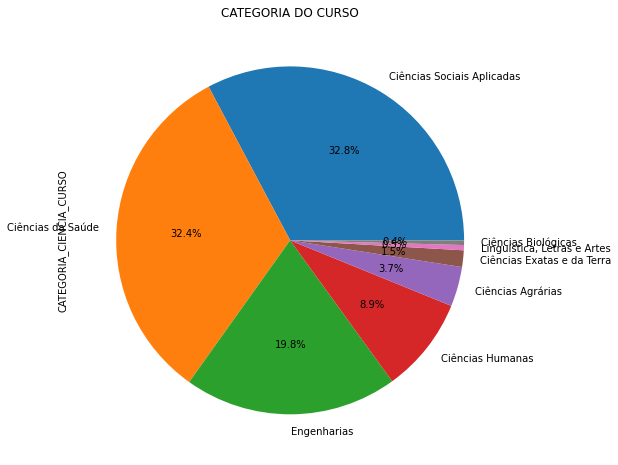

In [ ]:
plot = df9['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df9.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    373936
N    105443
P     32500
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

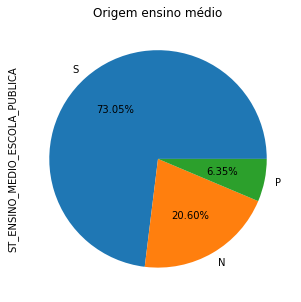

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df9['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df9['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df9.DS_SEXO.value_counts()

Feminino     312815
Masculino    199064
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

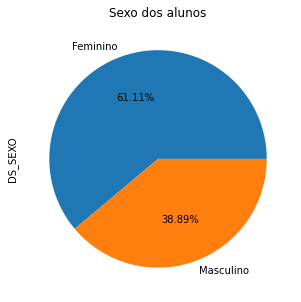

In [ ]:
plot = df9['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1563)
df9.NO_IES.value_counts()

UNIVERSIDADE ESTÁCIO DE SÁ                          16488
UNIVERSIDADE PAULISTA                               16165
Centro Universitário Estácio do Ceará                5219
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS     4129
UNIVERSIDADE POTIGUAR                                4050
                                                    ...  
FACULDADES SPEI                                         1
Faculdade de Ciências Jurídicas de Serrinha             1
FACULDADES INTEGRADAS PAULISTA                          1
Faculdades Sulamérica Bahia                             1
INSTITUTO SUPERIOR DE EDUCAÇÃO ALMEIDA RODRIGUES        1
Name: NO_IES, Length: 1563, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 461)
df9.NO_MUNICIPIO.value_counts()

São Paulo         55288
Belo Horizonte    47154
Rio de Janeiro    28251
Valinhos          23937
Salvador          22079
                  ...  
Itapevi               1
Itápolis              1
Junqueirópolis        1
Matão                 1
Cianorte              1
Name: NO_MUNICIPIO, Length: 461, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df9.ST_DEFICIENCIA.value_counts()

N    509315
S      2564
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

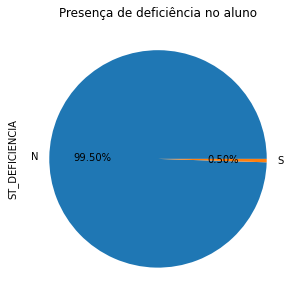

In [ ]:
plot = df9['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df9.DS_RACA_COR.value_counts()

Pardo      229005
Branco     212445
Negro       57565
Amarelo     11764
Índio        1100
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

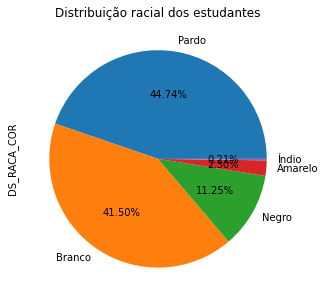

In [ ]:
plot = df9['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df9.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    316847
Banco do Brasil            195032
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

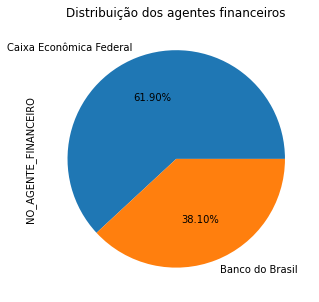

In [ ]:
plot = df9['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df9.DS_ESTADO_CIVIL.value_counts()

Solteiro         437028
Casado            51715
União estável     12168
Divorciado         8153
Separado           2305
Viúvo               510
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

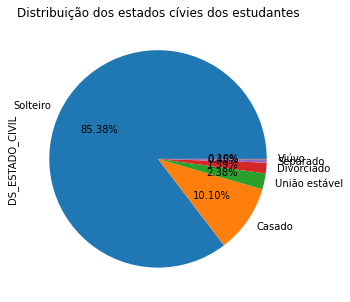

In [ ]:
plot = df9['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df9.DS_PERIODICIDADE_CUR.value_counts()

Semestral     500113
Anual          11569
Trimestral       197
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

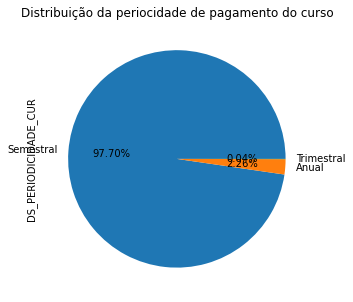

In [ ]:
plot = df9['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df9.NU_ANO_PROC.value_counts()

2019    511879
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df9ComLinhasDuplicads.NU_MES_PROC.value_counts()

6    1140843
5     885465
7     574702
4     264530
3     206285
2      24082
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

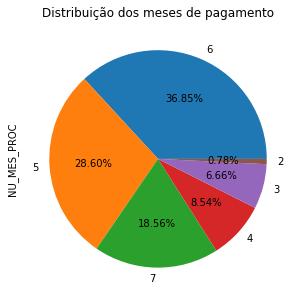

In [ ]:
plot = df9ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df9ComLinhasDuplicads.NU_MES.value_counts()

6     505842
5     505787
2     505670
1     505669
3     505597
4     505511
12     10834
11     10628
10     10226
9      10096
8      10024
7      10023
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

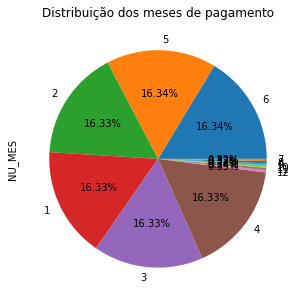

In [ ]:
plot = df9ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df9.NU_SEMESTRE.value_counts()

1    503393
2      8486
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

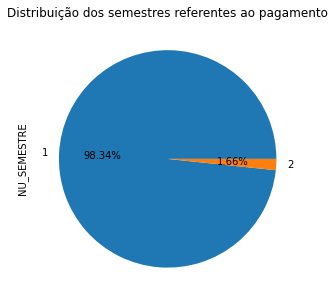

In [ ]:
plot = df9['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df9ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    3034076
2      61831
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

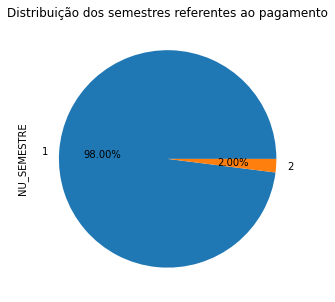

In [ ]:
plot = df9ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df9ComLinhasDuplicads.NU_ANO.value_counts()

2019    3007762
2018      55579
2015      20333
2017       6408
2016       3009
2014       2046
2013        461
2012        201
2011         90
2010         18
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

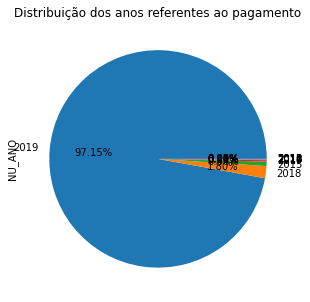

In [ ]:
plot = df9ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df9.TP_FIANCA.value_counts()

F    411951
N     97804
S      2124
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

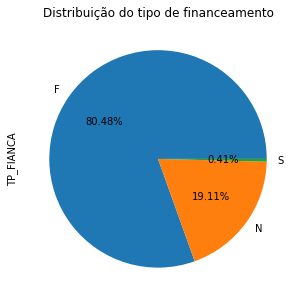

In [ ]:
plot = df9['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df9.DS_TIPO_CURSO.value_counts()

Bacharelado     493033
Licenciatura     12772
Tecnológico       6074
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

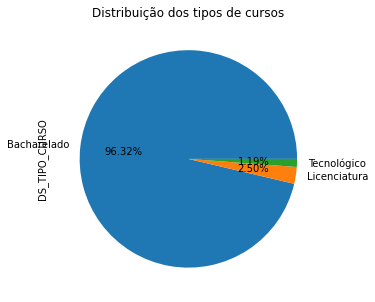

In [ ]:
plot = df9['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df9.CO_PROCESSO.value_counts()

317    124151
319     92255
310     73345
320     68605
318     57157
314     36209
311     17255
315     15643
308     10035
321      8459
322      5568
309      1565
316      1407
312       221
313         4
Name: CO_PROCESSO, dtype: int64

In [ ]:
df9.NU_ANO_EXERCICIO_INSC.value_counts()

2015    130830
2014    127584
2017    119753
2016    115489
2013     16801
2012      1046
2011       256
2010       106
2018         8
2009         5
2007         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df9.NU_PERCENTUAL_PROUNI.value_counts()

0,00     496283
50,00     15596
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df9.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    223550
75,00      20120
94,00      18407
95,00      17341
50,00      16984
           ...  
14,00          5
17,00          4
12,00          3
8,00           2
11,00          1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 92, dtype: int64

In [ ]:
df9.VL_REPASSE.value_counts()

47498.03    163
95036.20    124
52284.19    124
87714.27    117
90349.90    113
           ... 
63964.26      1
47921.52      1
63674.49      1
63131.04      1
42901.36      1
Name: VL_REPASSE, Length: 448487, dtype: int64

In [ ]:
df9.VL_PERC_FINANCIAMENTO.value_counts()

100,00    223550
75,00      20120
94,00      18407
95,00      17341
50,00      16984
           ...  
14,00          5
17,00          4
12,00          3
8,00           2
11,00          1
Name: VL_PERC_FINANCIAMENTO, Length: 92, dtype: int64

In [ ]:
df9.QT_SEMESTRE_FINANCIADO.value_counts()

10    292690
8      85790
9      43017
12     27964
11     20188
7      17181
6      11854
5       5222
13      4865
4       2295
3        387
14       257
15       104
2         48
17         5
16         5
1          4
21         1
18         1
19         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df9.VL_REPASSE.sum()

28667545020.75

In [ ]:
df9.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   6632286512.830
MG   4700318340.600
BA   2202222154.180
RJ   2184471045.030
RS   1575068438.210
CE   1418792508.220
PR   1261558396.410
PB   1220568637.700
PE    964589912.290
DF    868995791.230
SC    724436221.380
GO    706094405.420
MT    656704372.470
SE    456394350.310
ES    417008768.680
PA    409138536.420
RN    366375515.840
PI    319099742.560
RO    309609677.830
MA    300953755.230
AM    272050927.770
AC    207054476.970
MS    142135282.570
AL    135202361.910
AP     96056520.090
RR     65179426.420
TO     55178942.180
Name: VL_REPASSE, dtype: float64

In [ ]:
df9_vl_estados_interativo = df9.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df9_vl_estados_interativo.index,
               y=df9_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df9.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        13934084667.140
NORDESTE        7384198938.240
SUL             3561063056.000
CENTRO-OESTE    2373929851.690
NORTE           1414268507.680
Name: VL_REPASSE, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             12574873095.850
Ciências Sociais Aplicadas     7212033225.390
Engenharias                    5272370932.740
Ciências Humanas               1925870389.330
Ciências Agrárias              1324575919.350
Ciências Exatas e da Terra      228449397.710
Linguística, Letras e Artes      72787993.870
Ciências Biológicas              56584066.510
Name: VL_REPASSE, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df9.VALOR_SEMESTRE_PAGO.sum()

4173844413.2800007

In [ ]:
df9.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   949778616.450
MG   673762125.770
BA   318618309.240
RJ   317170168.000
RS   233431847.660
CE   212976428.470
PB   193591178.940
PR   177995720.290
PE   143698819.120
DF   121064674.600
GO   102619761.440
SC   100995847.900
MT    91449537.140
PA    71237054.410
SE    63747198.370
ES    57521230.680
RN    54852243.630
PI    50883620.330
RO    45426532.650
MA    44660969.770
AM    41575667.610
AC    30347152.130
MS    20391971.460
AL    20072184.930
AP    15572787.020
TO    10605562.490
RR     9797202.780
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df9_vl_estados_interativo = df9.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df9_vl_estados_interativo.index,
               y=df9_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df9.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        1998232140.900
NORDESTE       1103100952.800
SUL             512423415.850
CENTRO-OESTE    335525944.640
NORTE           224561959.090
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1851051413.100
Ciências Sociais Aplicadas    1046540009.300
Engenharias                    737424882.320
Ciências Humanas               285660914.890
Ciências Agrárias              194703386.100
Ciências Exatas e da Terra      37156856.720
Linguística, Letras e Artes     12106276.370
Ciências Biológicas              9200674.480
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df9.VALOR_ARQUIVO_PAGO.sum()

4222011400.089999

In [ ]:
df9.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   972739096.550
MG   679840844.130
BA   320816926.330
RJ   318981461.800
RS   234778778.900
CE   214237119.430
PB   195177717.580
PR   179248494.010
PE   144683836.410
DF   122764282.880
GO   103564592.390
SC   101445542.500
MT    92529233.000
PA    71859179.250
SE    64210890.550
ES    57824614.200
RN    55096331.850
PI    51184264.010
RO    46600536.940
MA    44932248.130
AM    41900532.570
AC    30731329.680
MS    20584141.620
AL    20152758.690
AP    15707176.880
TO    10613453.270
RR     9806016.540
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df9_vl_estados_interativo = df9.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df9_vl_estados_interativo.index,
               y=df9_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df9.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        13934084667.140
NORDESTE        7384198938.240
SUL             3561063056.000
CENTRO-OESTE    2373929851.690
NORTE           1414268507.680
Name: VL_REPASSE, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1874966854.080
Ciências Sociais Aplicadas    1060018184.820
Engenharias                    743032459.010
Ciências Humanas               288650490.480
Ciências Agrárias              196031445.590
Ciências Exatas e da Terra      37613100.720
Linguística, Letras e Artes     12407114.050
Ciências Biológicas              9291751.340
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df9_vl_regiao_interativo = df9.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df9_vl_regiao_interativo.index,
               y=df9_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2019.2

##Analisando os valores por estado.

In [ ]:
df18['#SG_UF'].value_counts()

SP    35047
MG    27631
BA    17460
RS    10564
PR     9399
CE     7008
RJ     6935
PB     6609
GO     5694
MT     5435
PE     4697
SE     4678
SC     4090
PA     3363
PI     3280
DF     3171
ES     3070
RO     2580
MA     2570
MS     1762
AC     1538
AM     1486
AL     1352
RN     1307
TO      734
AP      615
RR      517
Name: #SG_UF, dtype: int64

In [ ]:
df18_estados_interativo = df18['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df18_estados_interativo.index,
               y=df18_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df18.REGIAO.value_counts()

SUDESTE         72683
NORDESTE        48961
SUL             24053
CENTRO-OESTE    16062
NORTE           10833
Name: REGIAO, dtype: int64

In [ ]:
df18_regiao_interativo = df18.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_regiao_interativo.index,
               y=df18_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 304)
df18.DS_CURSO.value_counts()

DIREITO                                                           33513
ENFERMAGEM                                                        16598
ENGENHARIA CIVIL                                                  14592
PSICOLOGIA                                                        12320
MEDICINA                                                          11131
FISIOTERAPIA                                                       9585
ODONTOLOGIA                                                        9332
ARQUITETURA E URBANISMO                                            7038
FARMÁCIA                                                           6421
MEDICINA VETERINÁRIA                                               5522
ADMINISTRAÇÃO                                                      5326
ENGENHARIA DE PRODUÇÃO                                             4310
ENGENHARIA MECÂNICA                                                4028
CIÊNCIAS CONTÁBEIS                                              

In [ ]:
pd.reset_option("^display")

In [ ]:
df18_curso_interativo = df18.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df18_curso_interativo.index,
               y=df18_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df18.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências da Saúde              62561
Ciências Sociais Aplicadas     53369
Engenharias                    30959
Ciências Humanas               14487
Ciências Agrárias               7694
Ciências Exatas e da Terra      2200
Ciências Biológicas              664
Linguística, Letras e Artes      658
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

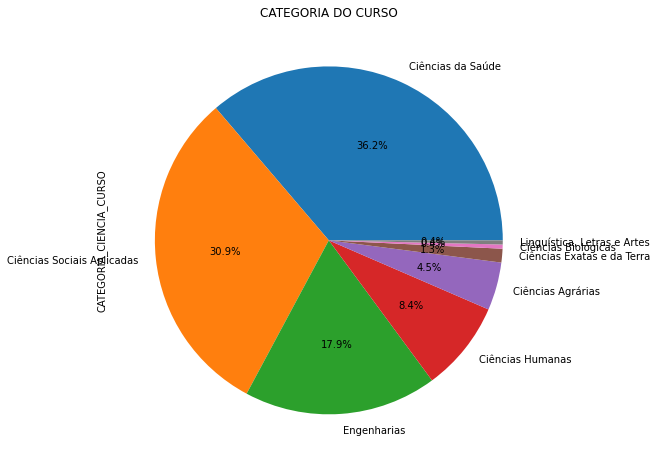

In [ ]:
plot = df18['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df18.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    125527
N     37099
P      9966
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

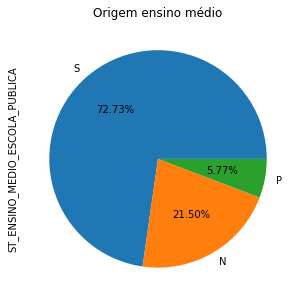

In [ ]:
plot = df18['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df18.DS_SEXO.value_counts()

Feminino     108372
Masculino     64220
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

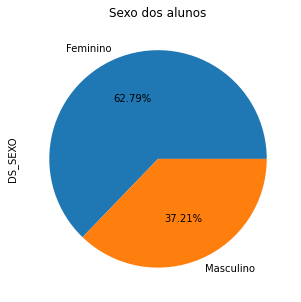

In [ ]:
plot = df18['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1417)
df18.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                            2896
UNIVERSIDADE TIRADENTES                                          2691
UNIVERSIDADE DE CUIABÁ                                           1713
UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUAI E DAS MISSÕES    1679
FACULDADE PITÁGORAS DE SÃO LUIZ                                  1538
                                                                 ... 
FACULDADE DE FILOSOFIA CIÊNCIAS E LETRAS DE PENÁPOLIS               1
INSTITUTO PERNAMBUCANO DE ENSINO SUPERIOR                           1
FACULDADE MOZARTEUM DE SÃO PAULO                                    1
FACULDADE ASSOCIADA BRASIL                                          1
FACULDADE JK - PLANO PILOTO                                         1
Name: NO_IES, Length: 1417, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 444)
df18.NO_MUNICIPIO.value_counts()

Belo Horizonte    16384
Valinhos          11143
São Paulo          9234
Salvador           7540
Aracaju            4620
                  ...  
Monte Santo           1
Itaberaí              1
Rosana                1
Machado               1
Jacareí               1
Name: NO_MUNICIPIO, Length: 444, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df18.ST_DEFICIENCIA.value_counts()

N    171733
S       859
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

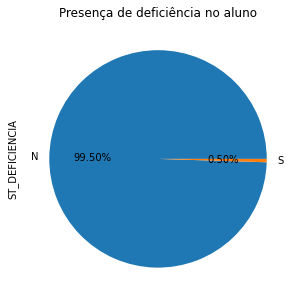

In [ ]:
plot = df18['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df18.DS_RACA_COR.value_counts()

Branco     76088
Pardo      74823
Negro      17560
Amarelo     3786
Índio        335
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

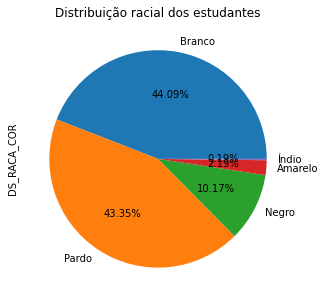

In [ ]:
plot = df18['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df18.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    103543
Banco do Brasil             69049
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

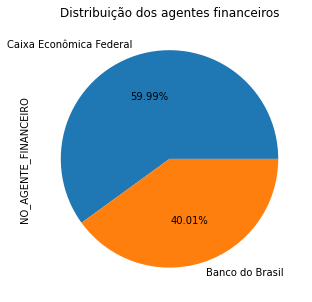

In [ ]:
plot = df18['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df18.DS_ESTADO_CIVIL.value_counts()

Solteiro         148958
Casado            16294
União estável      3854
Divorciado         2667
Separado            669
Viúvo               150
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

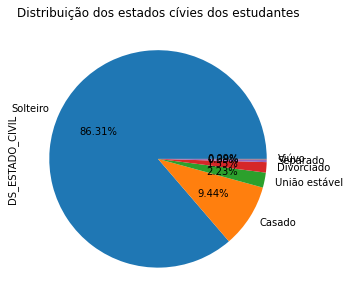

In [ ]:
plot = df18['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df18.DS_PERIODICIDADE_CUR.value_counts()

Semestral     166736
Anual           5811
Trimestral        45
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

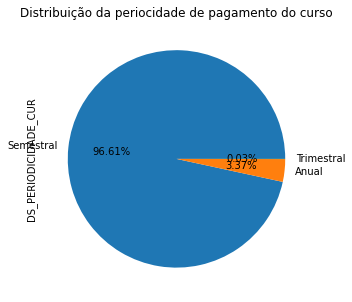

In [ ]:
plot = df18['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df18.NU_ANO_PROC.value_counts()

2019    172592
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df18ComLinhasDuplicads.NU_MES_PROC.value_counts()

10    420086
9     109941
8      23665
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

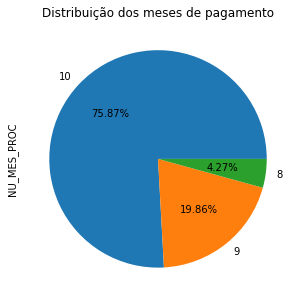

In [ ]:
plot = df18ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df18ComLinhasDuplicads.NU_MES.value_counts()

7     165608
8     165606
9     165560
6       8398
5       8338
4       8296
3       8294
1       8290
2       8290
12      2387
11      2334
10      2291
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

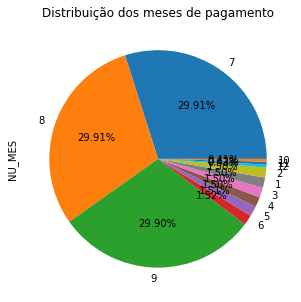

In [ ]:
plot = df18ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df18.NU_SEMESTRE.value_counts()

2    164530
1      8062
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

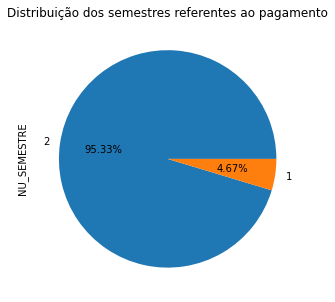

In [ ]:
plot = df18['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df18ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    503786
1     49906
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

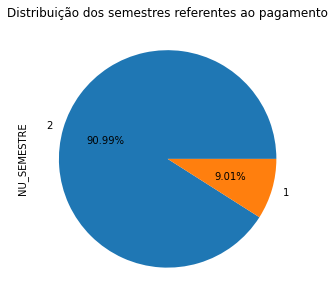

In [ ]:
plot = df18ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df18ComLinhasDuplicads.NU_ANO.value_counts()

2019    528270
2018      9233
2011      4830
2012      4164
2010      2496
2017      1713
2013      1001
2015       690
2016       666
2014       629
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

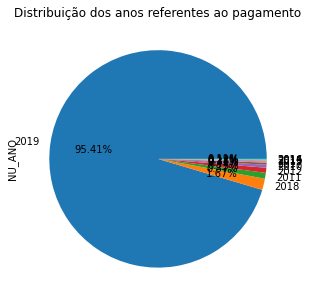

In [ ]:
plot = df18ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df18.TP_FIANCA.value_counts()

F    138421
N     33336
S       835
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

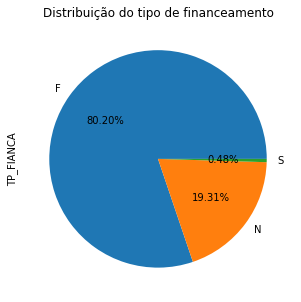

In [ ]:
plot = df18['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df18.DS_TIPO_CURSO.value_counts()

Bacharelado     167281
Licenciatura      3874
Tecnológico       1437
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

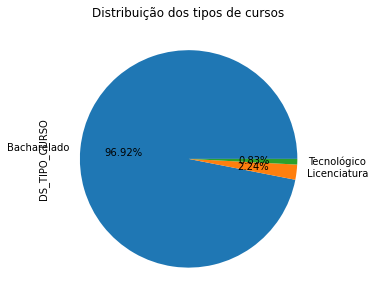

In [ ]:
plot = df18['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df18.CO_PROCESSO.value_counts()

327    98589
325    33769
328    22748
323     8622
326     7101
324     1763
Name: CO_PROCESSO, dtype: int64

In [ ]:
df18.NU_ANO_EXERCICIO_INSC.value_counts()

2015.0    49009
2017.0    48636
2016.0    44329
2014.0    26912
2013.0     1461
2010.0     1304
2011.0      674
2012.0      184
2009.0       64
2008.0        9
2018.0        7
2007.0        2
2019.0        1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df18.NU_PERCENTUAL_PROUNI.value_counts()

0,00     167994
50,00      4598
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df18.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    62773
94,00      7647
95,00      7063
93,00      6473
75,00      6324
          ...  
19,00         4
18,00         4
17,00         3
14,00         1
9,00          1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 89, dtype: int64

In [ ]:
df18.VL_REPASSE.value_counts()

47498.03     148
52284.19      86
67037.31      68
456221.00     66
80050.44      65
            ... 
26263.61       1
32537.92       1
26091.07       1
55779.76       1
42901.36       1
Name: VL_REPASSE, Length: 151339, dtype: int64

In [ ]:
df18.VL_PERC_FINANCIAMENTO.value_counts()

100,00    62773
94,00      7647
95,00      7063
93,00      6473
75,00      6324
          ...  
19,00         4
18,00         4
17,00         3
14,00         1
9,00          1
Name: VL_PERC_FINANCIAMENTO, Length: 89, dtype: int64

In [ ]:
df18.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    98546
8.0     27396
9.0     14428
12.0    12923
11.0     6704
7.0      5153
6.0      3736
13.0     1703
5.0      1281
4.0       447
14.0       99
3.0        93
15.0       50
2.0        25
1.0         3
17.0        3
18.0        1
19.0        1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df18.VL_REPASSE.sum()

9976180024.7

In [ ]:
df18.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   2305012897.810
MG   1632739821.880
BA    831823508.220
RS    687093421.310
PR    550035040.670
PB    525726537.720
RJ    434539736.070
MT    367204588.800
CE    330788262.900
GO    280236161.740
SE    269260434.360
SC    237416962.230
DF    211411713.770
PE    198423289.230
ES    184428968.260
RO    165304543.860
PA    150308454.590
PI    117941420.150
MA     88960691.310
AC     83425722.530
AL     77734865.520
AM     61250763.770
MS     60110408.260
RN     52081267.760
AP     28820717.030
TO     28241882.170
RR     15857942.780
Name: VL_REPASSE, dtype: float64

In [ ]:
df18_vl_estados_interativo = df18.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df18_vl_estados_interativo.index,
               y=df18_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df18.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        4556721424.020
NORDESTE       2492740277.170
SUL            1474545424.210
CENTRO-OESTE    918962872.570
NORTE           533210026.730
Name: VL_REPASSE, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             5264543159.200
Ciências Sociais Aplicadas    2055403651.950
Engenharias                   1516129090.290
Ciências Humanas               561021438.170
Ciências Agrárias              489490208.870
Ciências Exatas e da Terra      55747342.640
Linguística, Letras e Artes     18315802.010
Ciências Biológicas             15529331.570
Name: VL_REPASSE, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df18.VALOR_SEMESTRE_PAGO.sum()

804706801.3799999

In [ ]:
df18.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   176746544.880
MG   134728481.820
BA    67741855.260
RS    55104326.720
PB    45127121.920
PR    41676828.390
RJ    34414077.280
MT    31546794.890
CE    29740856.400
GO    22878469.290
SE    19702641.490
SC    18494295.060
PE    16685689.210
DF    15638446.120
PA    14739102.420
ES    13917374.110
RO    13213036.280
PI    10334495.180
MA     7384647.510
AC     6863200.640
AL     6188005.890
AM     5179692.010
RN     4995022.270
MS     4806377.760
TO     3000838.860
AP     2571492.630
RR     1287087.090
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df18_vl_estados_interativo = df18.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df18_vl_estados_interativo.index,
               y=df18_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df18.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        359806478.090
NORDESTE       207900335.130
SUL            115275450.170
CENTRO-OESTE    74870088.060
NORTE           46854449.930
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             415841801.100
Ciências Sociais Aplicadas    173171119.100
Engenharias                   119430251.130
Ciências Humanas               47360996.080
Ciências Agrárias              40096059.770
Ciências Exatas e da Terra      5570049.950
Linguística, Letras e Artes     1758794.980
Ciências Biológicas             1477729.270
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df18.VALOR_ARQUIVO_PAGO.sum()

811369597.74

In [ ]:
df18.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   177612847.800
MG   136227655.260
BA    68081374.620
RS    55558541.030
PB    45340770.820
PR    41839952.970
RJ    34613829.190
MT    32698349.900
CE    29966263.080
GO    23024773.620
SE    19788740.110
SC    18656428.230
PE    16704362.860
DF    15775847.290
PA    14960187.720
ES    14081132.170
RO    13322498.300
PI    10395805.010
MA     7455670.380
AC     7009447.550
AL     6194838.990
AM     5277782.410
RN     5034643.180
MS     4847306.790
TO     3009544.440
AP     2592056.190
RR     1298947.830
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df18_vl_estados_interativo = df18.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df18_vl_estados_interativo.index,
               y=df18_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df18.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        362535464.420
NORDESTE       208962469.050
SUL            116054922.230
CENTRO-OESTE    76346277.600
NORTE           47470464.440
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             418952067.510
Ciências Sociais Aplicadas    174964615.700
Engenharias                   120280827.930
Ciências Humanas               47723408.140
Ciências Agrárias              40536753.440
Ciências Exatas e da Terra      5617026.590
Linguística, Letras e Artes     1777472.320
Ciências Biológicas             1517426.110
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df18_vl_regiao_interativo = df18.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df18_vl_regiao_interativo.index,
               y=df18_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")